<a href="https://colab.research.google.com/github/leesa9596/practice/blob/main/Deep_Learning_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

-------

1


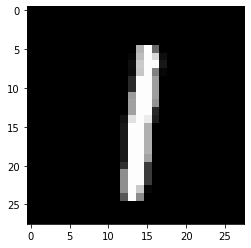

In [4]:
import matplotlib.pyplot as plt 
%matplotlib inline 


index = 40 
img = x_train[index]
print(y_train[index])
plt.imshow(img,cmap='gray')

-------

In [5]:

x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')

In [6]:

x_train /= 255
x_test /= 255

In [8]:


x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)


In [9]:


y_train[0]

5

In [10]:

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10) # convert class vector to binary class matirx
y_test = to_categorical(y_test, 10)

In [11]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

---------

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten
# from tensorflow.keras import layers
# from tensorflow.keras import optimizers

In [13]:
def create_model():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(17, 'relu'))
    model.add(Dense(units=10, activation='softmax'))

    return model

In [14]:
model_f = create_model()

In [15]:
model_f.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 17)                1105      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                180       
Total params: 51,525
Trainable params: 51,525
Non-trainable params: 0
_________________________________________________________________


------

In [16]:
model_f.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
             metrics = ['accuracy'])

---------

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size = 5/6)

In [19]:
history = model_f.fit(x_train, y_train, validation_data=(x_val,y_val), epochs=5)

Epoch 1/5
1563/1563 [==============================] - 4s 2ms/step - loss: 0.3527 - accuracy: 0.8988 - val_loss: 0.2261 - val_accuracy: 0.9353
Epoch 2/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1641 - accuracy: 0.9526 - val_loss: 0.1639 - val_accuracy: 0.9524
Epoch 3/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1225 - accuracy: 0.9646 - val_loss: 0.1464 - val_accuracy: 0.9564
Epoch 4/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0986 - accuracy: 0.9709 - val_loss: 0.1472 - val_accuracy: 0.9565
Epoch 5/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0821 - accuracy: 0.9754 - val_loss: 0.1320 - val_accuracy: 0.9605


In [20]:
vars(history) 

{'_chief_worker_only': None,
 '_supports_tf_logs': False,
 'epoch': [0, 1, 2, 3, 4],
 'history': {'accuracy': [0.8987600207328796,
   0.9526000022888184,
   0.9645599722862244,
   0.9708799719810486,
   0.9754199981689453],
  'loss': [0.3527124524116516,
   0.1641022264957428,
   0.12252423912286758,
   0.09861402958631516,
   0.08207827061414719],
  'val_accuracy': [0.9352999925613403,
   0.9524000287055969,
   0.9563999772071838,
   0.9564999938011169,
   0.9605000019073486],
  'val_loss': [0.22607216238975525,
   0.16393904387950897,
   0.14635592699050903,
   0.14722304046154022,
   0.13198277354240417]},
 'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x7fc90339e6d0>,
 'params': {'epochs': 5, 'steps': 1563, 'verbose': 1},
 'validation_data': None}

In [21]:
model_f = create_model()
model_f.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model_f.fit(x_train, y_train, validation_data=(x_val,y_val), epochs=5)

Epoch 1/5
1563/1563 [==============================] - 4s 2ms/step - loss: 0.3309 - accuracy: 0.9050 - val_loss: 0.1952 - val_accuracy: 0.9414
Epoch 2/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1516 - accuracy: 0.9553 - val_loss: 0.1589 - val_accuracy: 0.9521
Epoch 3/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1120 - accuracy: 0.9675 - val_loss: 0.1345 - val_accuracy: 0.9600
Epoch 4/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0885 - accuracy: 0.9737 - val_loss: 0.1187 - val_accuracy: 0.9623
Epoch 5/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0713 - accuracy: 0.9787 - val_loss: 0.1098 - val_accuracy: 0.9677


-----------

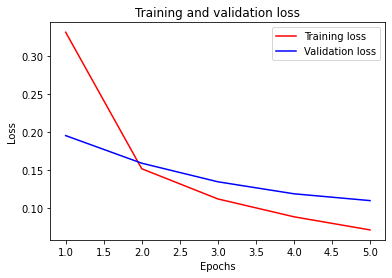

In [22]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()      
plt.show()

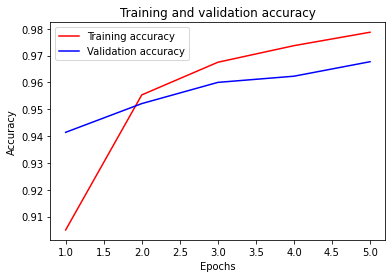

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

---------------

In [24]:
loss_and_metrics = model_f.evaluate(x_test, y_test, verbose=0)

In [25]:
print('\n')
print('test_loss: ' + str(loss_and_metrics[0]))
print('test_accuracy: ' + str(loss_and_metrics[1]*100) + '%')



test_loss: 0.0919918566942215
test_accuracy: 97.29999899864197%


------------